## Data Scientist Challenge

In this challenge you are assuming the position of a data scientist for a large corporation with offices in many states. The company you work for is looking to gain insights from its data from accross the many states that it does business over the course of the year 2014. The company runs many 'sales' over the course of the year in its states. The data you have is of the 10,000 different sales run in different states. Each sale lasts for a particular amount of time denotd by 'sale_start' and 'sale_end' columns. Along with each sale is the revenue for that particular sale.

The company is primarily interested in determining what is happening to revenue over time and what strategy should be undertaken to maximize revenue.

You don't need any advanced statistics for this assignment. Good exploration and visualizations will reveal everything you need to know about what is happening. Check out pandas time-series module documentation here - http://pandas.pydata.org/pandas-docs/stable/timeseries.html

Please fork the repository into your github profile, clone it and then start working on it locally.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sales = pd.read_csv('../data/sales.csv', parse_dates=['sale_start', 'sale_end'])

In [5]:
sales.head()

,state,sale_start,sale_end,revenue
0,Arkansas,2014-12-24,2014-12-24,1311.0
1,Florida,2014-10-15,2014-10-17,698.0
2,Iowa,2014-09-07,2014-09-07,1193.0
3,Indiana,2014-05-19,2014-05-22,469.0
4,Maine,2014-04-19,2014-04-19,334.0


# Executive Summary
Revenue per sale is declining for each state over the course of the year. This is a surprising finding at first because average revenue and total revenue overall is increasing. The reason this occurred is because the states with high average revenue greatly increased their total number of sales as the year went on. The states that had low average revenue decreased in number of sales from the start of the year. 

This current trend may or may not necessarily indicate a problem but it certainly cannot continue indefinitely.

# Data Inspection
Get a brief summary description of the columns. From the .info method below we can see there are no missing values and the date values are already converted to datetime64 which makes it easy to apply date methods to them.

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
state         10000 non-null object
sale_start    10000 non-null datetime64[ns]
sale_end      10000 non-null datetime64[ns]
revenue       10000 non-null float64
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 312.6+ KB


### Count of Sales per state
We can start the exploration by getting the raw counts of number of sales per state. From the plot below, all states have plenty of sales. There appear to be no outliers. The plot is done in seaborn and with pandas.

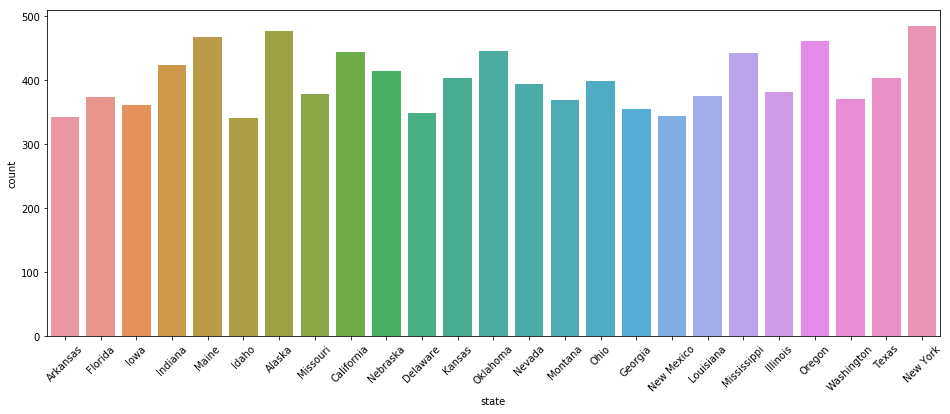

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='state', data=sales, ax=ax)
ax.tick_params(axis='x', rotation=45)

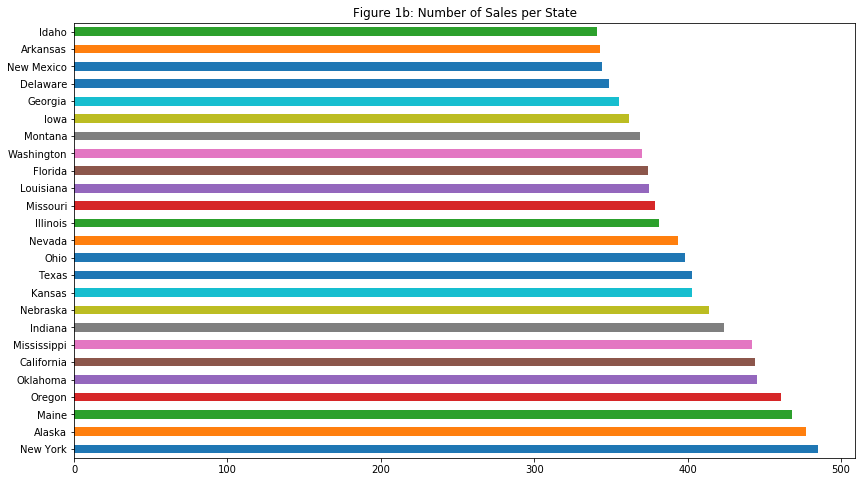

In [8]:
# plot the same data using pandas
sales['state'].value_counts().plot(kind='barh', figsize=(14,8), title='Figure 1b: Number of Sales per State');

# Examine duration of sales
The duration of the sales event is calculated by subtracting the start and end date. The duration appears to be very uniformly distributed.

In [9]:
# Find distribution of sales
# Very even distribution of sales. Sales last between 1 and 4 days (include start and end day)
(sales['sale_end'] - sales['sale_start']).value_counts()

3 days    2553
2 days    2507
1 days    2494
0 days    2446
dtype: int64

# Do longer number of sale days increase revenue?
It would seem natural that the more days in a sale the more revenue. Let's calculate the mean revenue for the different durations of sale. 

Revenue is just about equal for any duration of sale.

In [10]:
# First lets make a new column that has length of sale
sales['sale_length'] = sales['sale_end'] - sales['sale_start']

In [11]:
# Surprisingly, the length of sale has nothing to do with the amount of revenue generated.
sales.groupby('sale_length').agg({'revenue': 'mean'})

,revenue
sale_length,
0 days,883.903925
1 days,880.817963
2 days,894.498205
3 days,891.550725


# Get Overall Revenue Picture
A scatterplot of revenue over time is created. A smaller marker size is used to more finely display the data. This is the first chart to show some pattern. There appear to be two groups, one with higher revenue and one with lower.

Text(0.5,1,'Figure 2: All Sales')

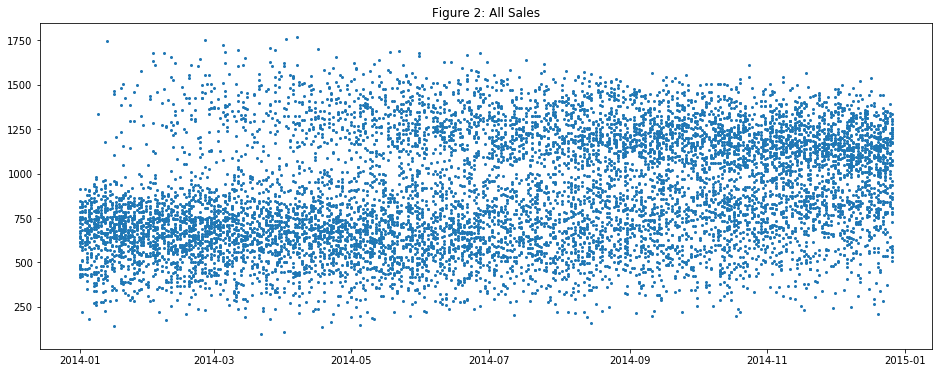

In [12]:
# seaborn does not do well with time series data
fig, ax = plt.subplots(figsize=(16,6))
ax.plot_date(sales['sale_start'], sales['revenue'], ms=2)
ax.set_title('Figure 2: All Sales')

# Is revenue different by state?
Average revenue per state is calculated and plotted below. There is a huge difference between states and it appears that several states cluster together with the same exact revenue.

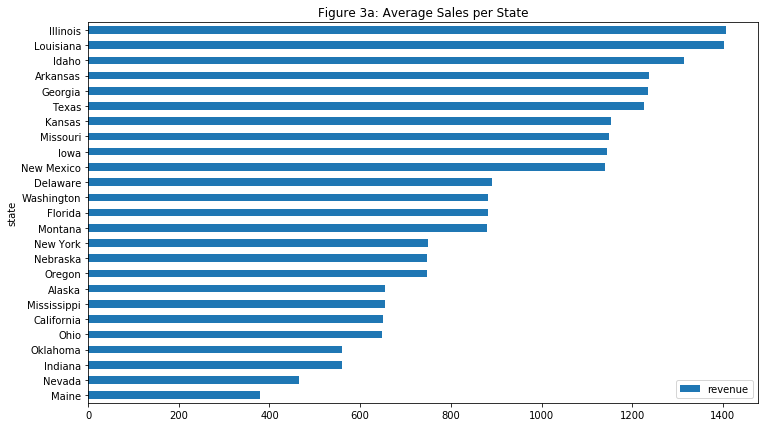

In [13]:
sales.groupby('state').agg({'revenue':'mean'})\
     .sort_values('revenue')\
     .plot(kind='barh', figsize=(12,7), title='Figure 3a: Average Sales per State')

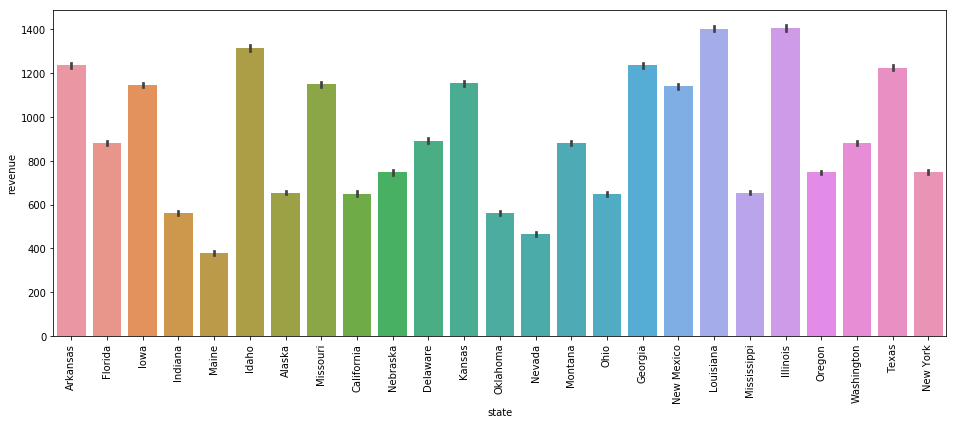

In [14]:
# using seaborn
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='state', y='revenue', data=sales, ax=ax)
ax.tick_params(axis='x', rotation=90)


# Average revenue per sale by month
We will put the start date in the index column to facilitate pandas time grouping functionality. The plot below shows that average revenue per sale by month is increasing. Revenue appears to be growing nicely for the company.

In [15]:
sales_t = sales.set_index('sale_start')
sales_t.head(10)

,state,sale_end,revenue,sale_length
sale_start,,,,
2014-12-24,Arkansas,2014-12-24,1311.0,0 days
2014-10-15,Florida,2014-10-17,698.0,2 days
2014-09-07,Iowa,2014-09-07,1193.0,0 days
2014-05-19,Indiana,2014-05-22,469.0,3 days
2014-04-19,Maine,2014-04-19,334.0,0 days
2014-12-07,Arkansas,2014-12-09,1200.0,2 days
2014-11-15,Idaho,2014-11-18,1258.0,3 days
2014-04-19,Alaska,2014-04-22,716.0,3 days
2014-06-27,Missouri,2014-06-29,1300.0,2 days


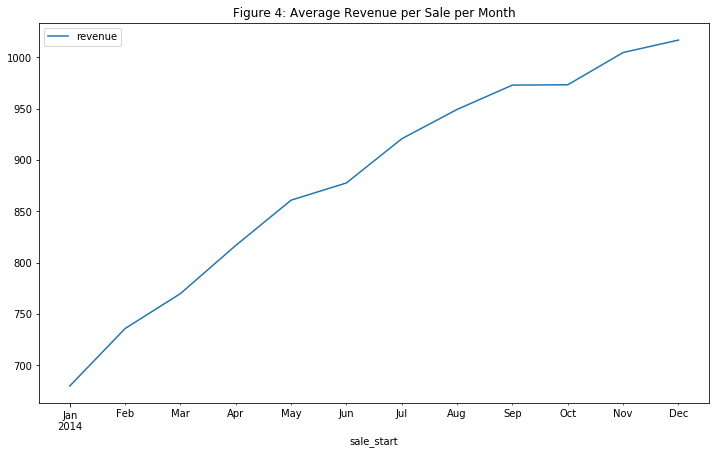

In [16]:
# Looks great. Average revenue per sale is going up. 
sales_t.resample('M').agg({'revenue':'mean'})\
       .plot(figsize=(12,7), title='Figure 4: Average Revenue per Sale per Month');

# Total Revenue per month
Overall, the actual total revenue per month is also increasing even though December was a poor month.

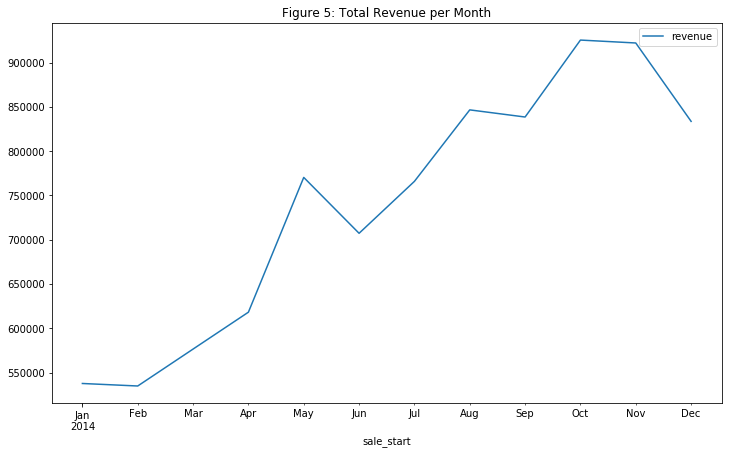

In [17]:
# But what about total revenue? Still looks good
sales_t.resample('M').agg({'revenue':'sum'})\
       .plot(figsize=(12,7), title='Figure 5: Total Revenue per Month');

# Look at total revenue by state
The above plots looked at total and average revenue without differentiating between states. Let's add another level of dimensionality and plot the same data by state. 

From the plot below, we clearly see two groups. One with total revenue going up and the other going down

In [18]:
tg = pd.Grouper(freq='M')
sales_state_total = sales_t.pivot_table(index=tg, columns='state', values='revenue', aggfunc='sum')
sales_state_total

state,Alaska,Arkansas,California,Delaware,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,...,Montana,Nebraska,Nevada,New Mexico,New York,Ohio,Oklahoma,Oregon,Texas,Washington
sale_start,,,,,,,,,,,,,,,,,,,,,
2014-01-31,46852.0,1445.0,57488.0,3252.0,5029.0,2867.0,4537.0,1744.0,38614.0,3668.0,...,3738.0,45514.0,26245.0,1424.0,56641.0,44284.0,44276.0,54839.0,1296.0,2042.0
2014-02-28,50926.0,10732.0,34943.0,8061.0,8010.0,12975.0,5767.0,9935.0,26023.0,10145.0,...,4560.0,38359.0,28115.0,7343.0,46122.0,37831.0,34877.0,48568.0,10067.0,4015.0
2014-03-31,37860.0,9597.0,34562.0,8723.0,10537.0,16705.0,15601.0,27774.0,28274.0,11396.0,...,17473.0,45913.0,27616.0,10581.0,50917.0,30251.0,31233.0,36390.0,14421.0,12123.0
2014-04-30,35960.0,14501.0,32918.0,26431.0,13113.0,20010.0,20521.0,26868.0,21643.0,20112.0,...,14276.0,36721.0,17232.0,17658.0,43186.0,25928.0,27764.0,40054.0,26871.0,13363.0
2014-05-31,34685.0,33597.0,23480.0,25922.0,23559.0,34602.0,38025.0,38581.0,28692.0,34826.0,...,27956.0,30006.0,17545.0,26177.0,35651.0,24094.0,26468.0,39894.0,36363.0,25061.0
2014-06-30,21115.0,36756.0,26395.0,22443.0,33545.0,29898.0,33992.0,49981.0,22341.0,29650.0,...,21156.0,26334.0,21328.0,37659.0,25727.0,25390.0,22295.0,23095.0,32964.0,25524.0
2014-07-31,20751.0,40456.0,19124.0,24870.0,32775.0,50998.0,46123.0,43168.0,19619.0,44582.0,...,27394.0,22396.0,13133.0,34206.0,32555.0,15673.0,17334.0,25316.0,51153.0,35674.0
2014-08-31,20418.0,47748.0,20223.0,28133.0,37439.0,36247.0,45472.0,63983.0,20309.0,45929.0,...,37482.0,25463.0,10521.0,54100.0,20406.0,15791.0,15684.0,23106.0,48350.0,34212.0
2014-09-30,15134.0,53743.0,11076.0,32588.0,31116.0,61039.0,44136.0,57519.0,10255.0,52084.0,...,37590.0,12260.0,8465.0,54344.0,17316.0,14869.0,11551.0,16402.0,57369.0,45990.0


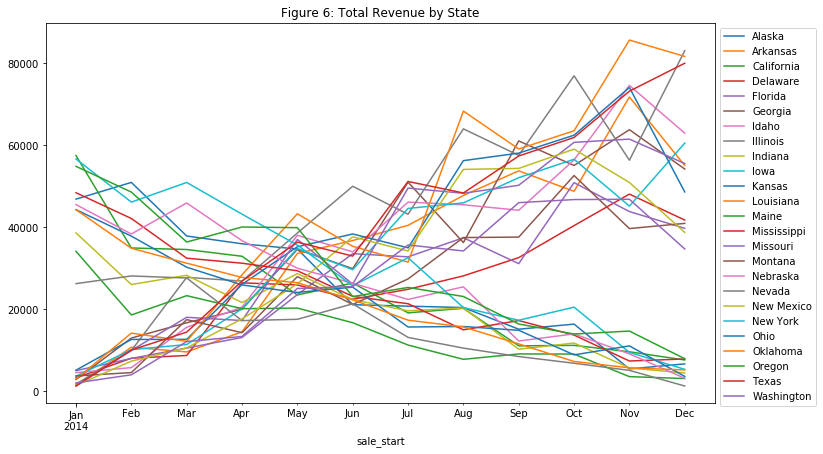

In [19]:
ax = sales_state_total.plot(figsize=(12, 7), title='Figure 6: Total Revenue by State')
ax.legend(bbox_to_anchor=(1,1))

# Look at average revenue by state
Along with total revenue, we can plot average revenue per state by month. This plot looks even more interesting. All of the states have decreasing average revenue over time. This is potentially very bad. Perhaps, market share is being gained by sacrificing the price of sales.

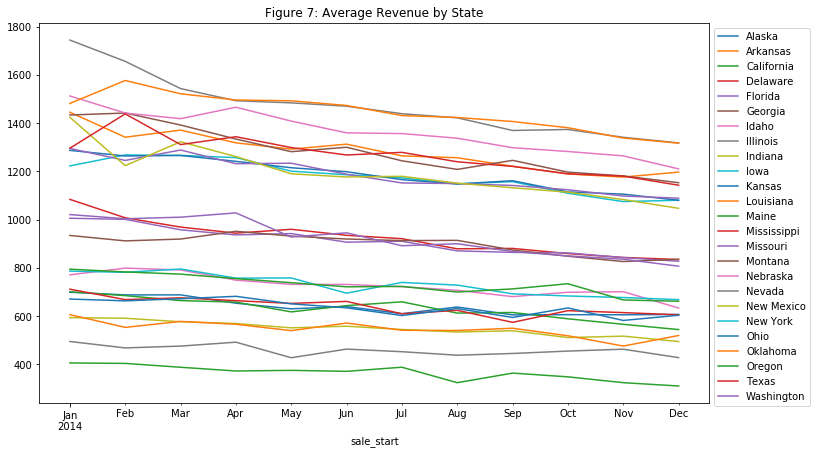

In [20]:
sales_state_avg = sales_t.pivot_table(index=tg, columns='state', values='revenue')
sales_state_avg.plot(figsize=(12, 7), title='Figure 7: Average Revenue by State').legend(bbox_to_anchor=(1,1))

# Why are total revenue and average sales rising overall but every state is seeing a decline in average revenue?
Overall total and average revenue increased throughout the year (figures 4 and 5) which looks fantastic but average revenue on a state-by-state basis is falling for every state (figure 6). This seems like a paradox. 

Some states are increasing total revenue over time with others decreasing total revenue over time. Let's create a new category for each state for each of these groups of states.

In [21]:
# reprint total revenue per state
sales_state_total

state,Alaska,Arkansas,California,Delaware,Florida,Georgia,Idaho,Illinois,Indiana,Iowa,...,Montana,Nebraska,Nevada,New Mexico,New York,Ohio,Oklahoma,Oregon,Texas,Washington
sale_start,,,,,,,,,,,,,,,,,,,,,
2014-01-31,46852.0,1445.0,57488.0,3252.0,5029.0,2867.0,4537.0,1744.0,38614.0,3668.0,...,3738.0,45514.0,26245.0,1424.0,56641.0,44284.0,44276.0,54839.0,1296.0,2042.0
2014-02-28,50926.0,10732.0,34943.0,8061.0,8010.0,12975.0,5767.0,9935.0,26023.0,10145.0,...,4560.0,38359.0,28115.0,7343.0,46122.0,37831.0,34877.0,48568.0,10067.0,4015.0
2014-03-31,37860.0,9597.0,34562.0,8723.0,10537.0,16705.0,15601.0,27774.0,28274.0,11396.0,...,17473.0,45913.0,27616.0,10581.0,50917.0,30251.0,31233.0,36390.0,14421.0,12123.0
2014-04-30,35960.0,14501.0,32918.0,26431.0,13113.0,20010.0,20521.0,26868.0,21643.0,20112.0,...,14276.0,36721.0,17232.0,17658.0,43186.0,25928.0,27764.0,40054.0,26871.0,13363.0
2014-05-31,34685.0,33597.0,23480.0,25922.0,23559.0,34602.0,38025.0,38581.0,28692.0,34826.0,...,27956.0,30006.0,17545.0,26177.0,35651.0,24094.0,26468.0,39894.0,36363.0,25061.0
2014-06-30,21115.0,36756.0,26395.0,22443.0,33545.0,29898.0,33992.0,49981.0,22341.0,29650.0,...,21156.0,26334.0,21328.0,37659.0,25727.0,25390.0,22295.0,23095.0,32964.0,25524.0
2014-07-31,20751.0,40456.0,19124.0,24870.0,32775.0,50998.0,46123.0,43168.0,19619.0,44582.0,...,27394.0,22396.0,13133.0,34206.0,32555.0,15673.0,17334.0,25316.0,51153.0,35674.0
2014-08-31,20418.0,47748.0,20223.0,28133.0,37439.0,36247.0,45472.0,63983.0,20309.0,45929.0,...,37482.0,25463.0,10521.0,54100.0,20406.0,15791.0,15684.0,23106.0,48350.0,34212.0
2014-09-30,15134.0,53743.0,11076.0,32588.0,31116.0,61039.0,44136.0,57519.0,10255.0,52084.0,...,37590.0,12260.0,8465.0,54344.0,17316.0,14869.0,11551.0,16402.0,57369.0,45990.0


### Making a group column
We will make a new column in our DataFrame that categorizes each state as **Up** or **Down** based on the total revenue over the year.

To do this we will compare from the **`sales_state_total`** aggregated table, the first row (January) to the last row (December). This will result in a boolean value which will then be mapped to Up or Down with the **`map`** Series method.

In [22]:
jan = sales_state_total.iloc[0]
dec = sales_state_total.iloc[-1]
jan

state
Alaska         46852.0
Arkansas        1445.0
California     57488.0
Delaware        3252.0
Florida         5029.0
Georgia         2867.0
Idaho           4537.0
Illinois        1744.0
Indiana        38614.0
Iowa            3668.0
Kansas          5148.0
Louisiana       2963.0
Maine          34122.0
Mississippi    48410.0
Missouri        1295.0
Montana         3738.0
Nebraska       45514.0
Nevada         26245.0
New Mexico      1424.0
New York       56641.0
Ohio           44284.0
Oklahoma       44276.0
Oregon         54839.0
Texas           1296.0
Washington      2042.0
Name: 2014-01-31 00:00:00, dtype: float64

In [23]:
states_up = jan < dec
states_up

state
Alaska         False
Arkansas        True
California     False
Delaware        True
Florida         True
Georgia         True
Idaho           True
Illinois        True
Indiana        False
Iowa            True
Kansas          True
Louisiana       True
Maine          False
Mississippi    False
Missouri        True
Montana         True
Nebraska       False
Nevada         False
New Mexico      True
New York       False
Ohio           False
Oklahoma       False
Oregon         False
Texas           True
Washington      True
dtype: bool

In [24]:
state_names_up = states_up[states_up].index
state_names_up

Index(['Arkansas', 'Delaware', 'Florida', 'Georgia', 'Idaho', 'Illinois',
       'Iowa', 'Kansas', 'Louisiana', 'Missouri', 'Montana', 'New Mexico',
       'Texas', 'Washington'],
      dtype='object', name='state')

### Adding column to track revenue group

In [25]:
sales_t['revenue_group'] = sales_t['state'].isin(state_names_up)
sales_t.head(10)

,state,sale_end,revenue,sale_length,revenue_group
sale_start,,,,,
2014-12-24,Arkansas,2014-12-24,1311.0,0 days,True
2014-10-15,Florida,2014-10-17,698.0,2 days,True
2014-09-07,Iowa,2014-09-07,1193.0,0 days,True
2014-05-19,Indiana,2014-05-22,469.0,3 days,False
2014-04-19,Maine,2014-04-19,334.0,0 days,False
2014-12-07,Arkansas,2014-12-09,1200.0,2 days,True
2014-11-15,Idaho,2014-11-18,1258.0,3 days,True
2014-04-19,Alaska,2014-04-22,716.0,3 days,False
2014-06-27,Missouri,2014-06-29,1300.0,2 days,True


## Map booleans to Strings

In [26]:
sales_t['revenue_group'] = sales_t['revenue_group'].map({True: 'Up', False: 'Down'})

# Overall average revenue for states where revenue went up vs those that went down
Classifying the states into two groups makes the analysis easier. We now look at the average revenue per sale from those two groups over the year. The Up group looks to have about double the revenue per sale than the Down group.

In [27]:
sales_t.head()

,state,sale_end,revenue,sale_length,revenue_group
sale_start,,,,,
2014-12-24,Arkansas,2014-12-24,1311.0,0 days,Up
2014-10-15,Florida,2014-10-17,698.0,2 days,Up
2014-09-07,Iowa,2014-09-07,1193.0,0 days,Up
2014-05-19,Indiana,2014-05-22,469.0,3 days,Down
2014-04-19,Maine,2014-04-19,334.0,0 days,Down


In [28]:
tg = pd.Grouper(freq='M')

In [29]:
sales_updown = sales_t.pivot_table(index=tg, columns='revenue_group', values='revenue')
sales_updown

revenue_group,Down,Up
sale_start,,
2014-01-31,656.048813,1225.696970
2014-02-28,648.317384,1283.990000
2014-03-31,641.991525,1244.037736
2014-04-30,633.843810,1230.435345
2014-05-31,604.639376,1204.701571
2014-06-30,598.768868,1186.947644
2014-07-31,606.997222,1159.741525
2014-08-31,597.214724,1151.814488
2014-09-30,579.318548,1131.744300


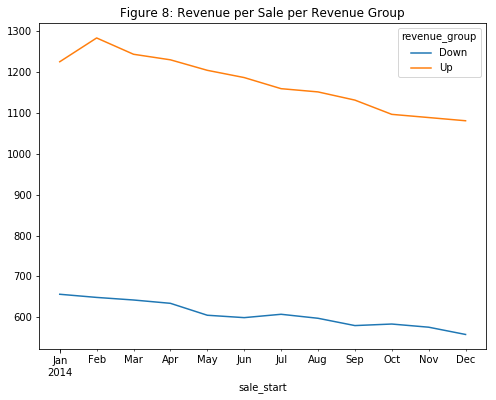

In [30]:
sales_updown.plot(figsize=(8,6), title='Figure 8: Revenue per Sale per Revenue Group')

# Frequency of sales per revenue group
Here the frequency of the sales per revenue group is plotted in figure 9. This figure shows a very interesting trend. The Down group is making much fewer sales over the course of the year and in fact some states are heading towards no sales at all. The Up group on the other hand is making more sales every month.

We can now explain the paradox of increasing overall total and average revenue but having every state decreasing average revenue per sale. The states with high average sales, the Up states had few sales at the beginning of the year and increased in frequency quite a bit from the start of the year. Conversely, states with lower than average revenue per sale, the Down states, drastically decreased the number of sales over the year.

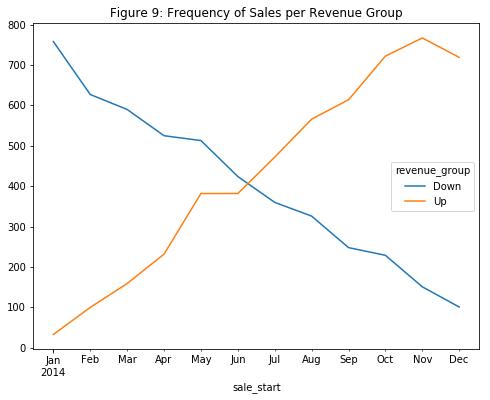

In [31]:
sales_t.pivot_table(index=tg, columns='revenue_group', values='revenue', aggfunc='size') \
       .plot(figsize=(8,6), title='Figure 9: Frequency of Sales per Revenue Group')

# Conclusion
Revenue per sale is declining for each state over the course of the year. This is a surprising finding at first because average revenue and total revenue overall is increasing. The reason this occurred is because high average revenue states greatly increased their number of sales as the year went on. The states that had low average revenue decreased in number of sales from the start of the year. 

Is this good or bad? Probably too difficult to tell without more information but it is troublesome that every single state had it's average revenue per sale decline. This trend cannot continue indefinitely.